In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
from data import *
from scoring import *
from IPython.core.display import display, HTML
from utils import clone_subset

In [2]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
_train = np.concatenate([_xtrain, _xcross])
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
train = np.concatenate([xtrain, xcross])
joint_test = np.concatenate([xtest, clone_subset(_xtest, xtest.dtype)])

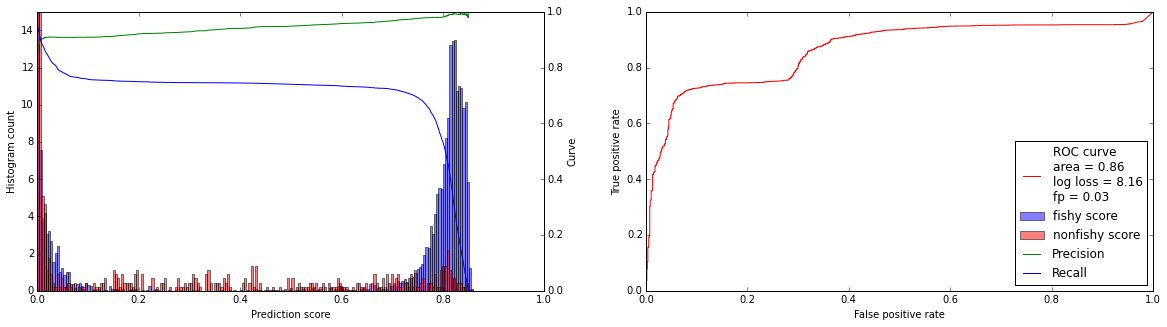

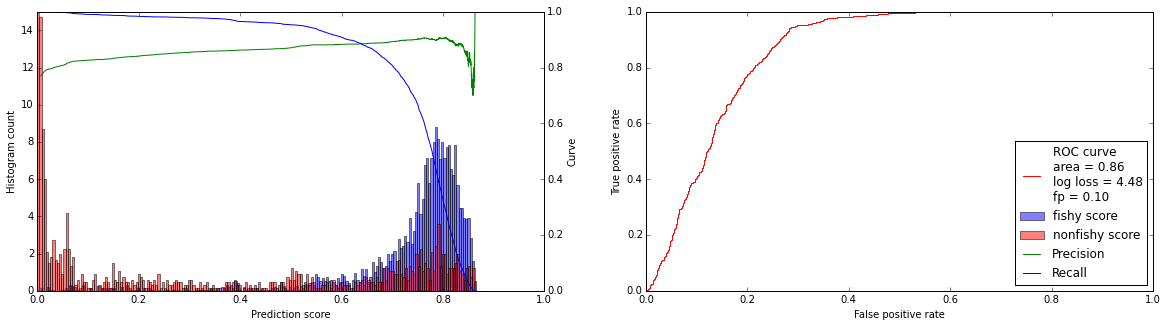

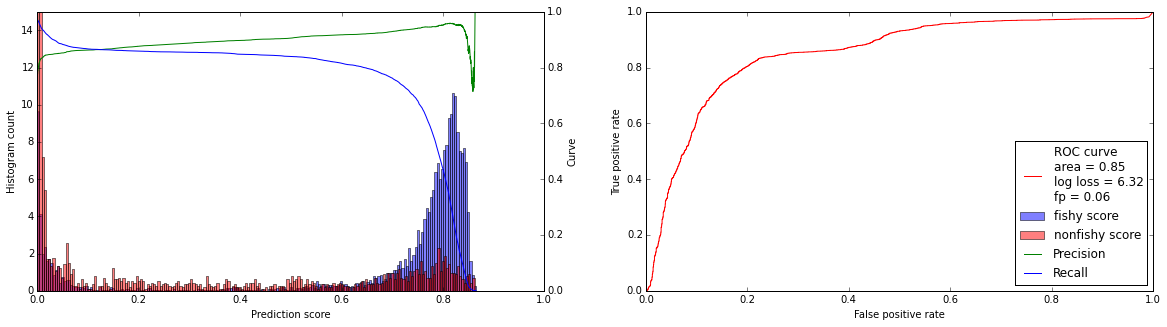

In [3]:
from logistic_model import LogisticModel
from evaluate_model import evaluate_model, train_model, compare_models

model = LogisticModel(cross=3, order=4, random_state=4321, windows=[86400])

# First train using Alex's data and then evaluate using both Kristina and Alex's data.
train_model(model, _train)

display(HTML("<h1>Train Using Alex's Data</h1>"))

evaluate_model(model, xtest, name="Evaluation Using Kristina's Data")

evaluate_model(model, _xtest, name="Evaluation Using Alex's Data")

evaluate_model(model, joint_test, name="Evaluation Using Mixed Data")

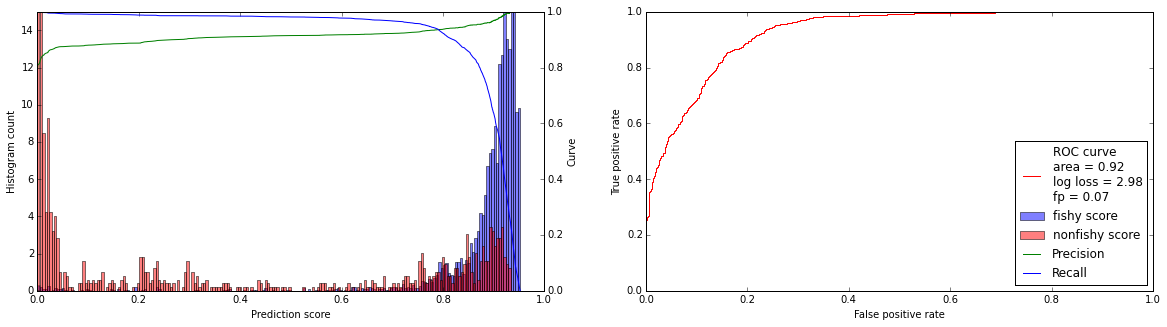

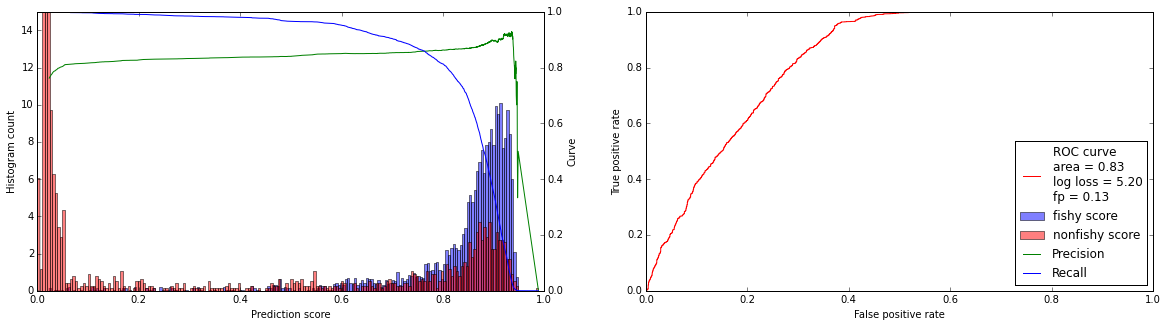

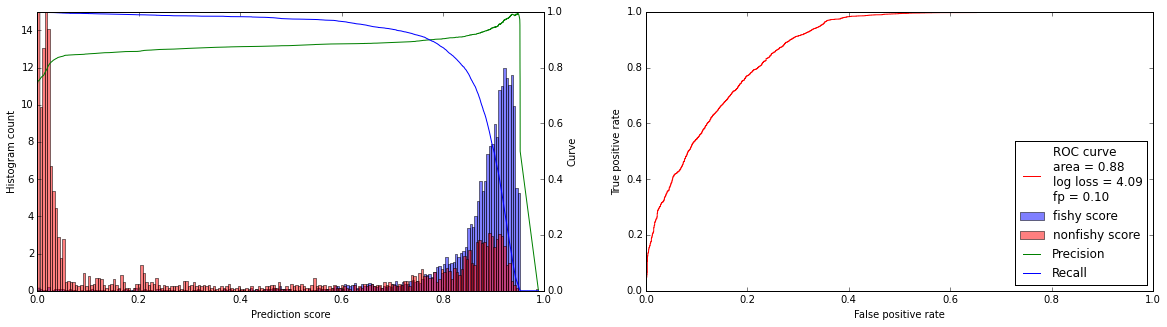

In [4]:
# Now train using Kristina's data and then evaluate using both Kristina and Alex's data.
train_model(model, train)

display(HTML("<h1>Train Using Kristina's Data</h1>"))

evaluate_model(model, xtest, name="Evaluation Using Kristina's Data")

evaluate_model(model, _xtest, name="Evaluation Using Alex's Data")

evaluate_model(model, joint_test, name="Evaluation Using Mixed Data")

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

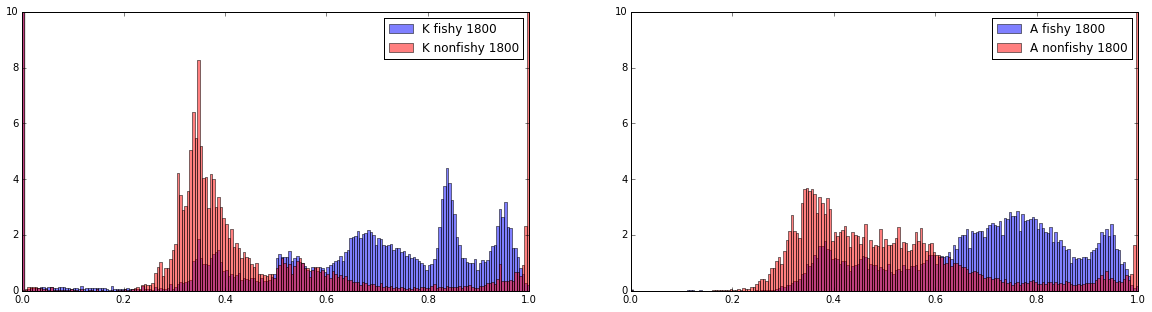

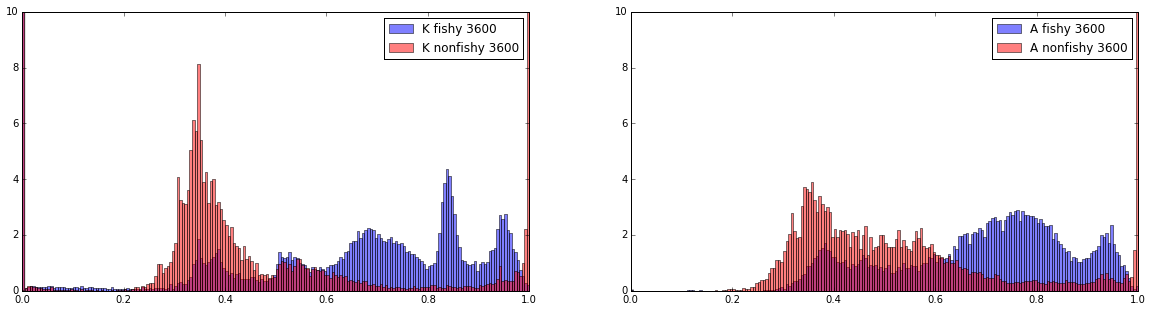

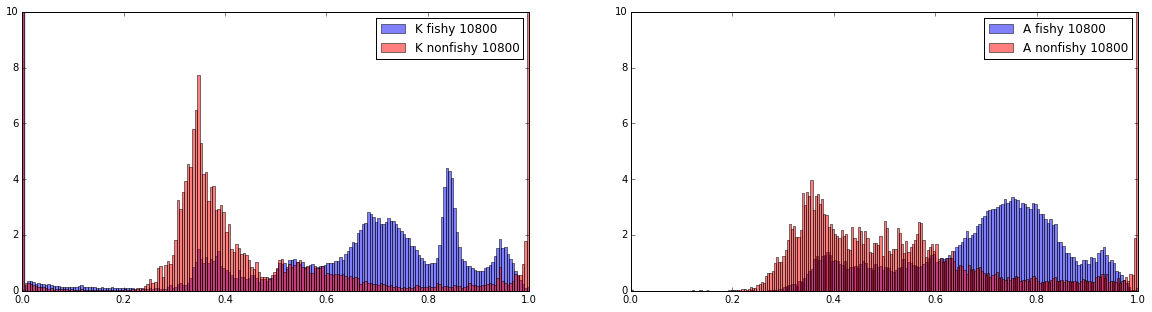

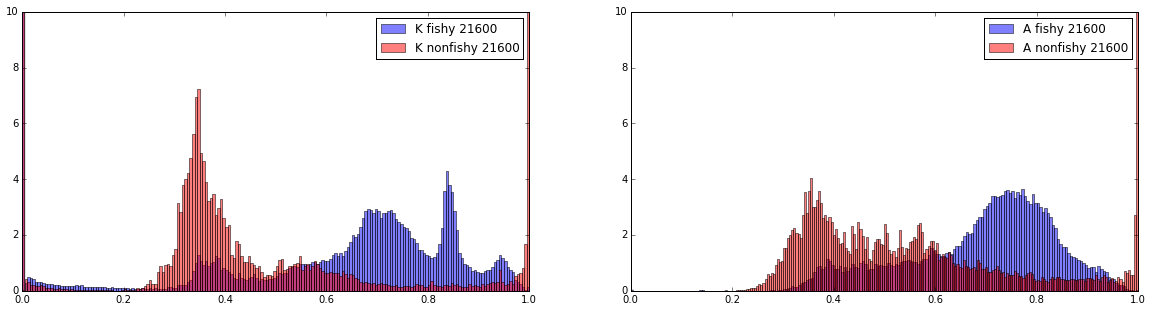

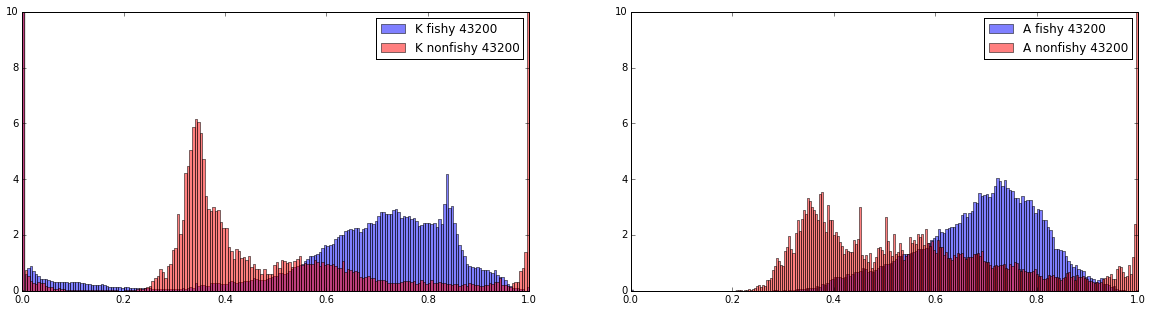

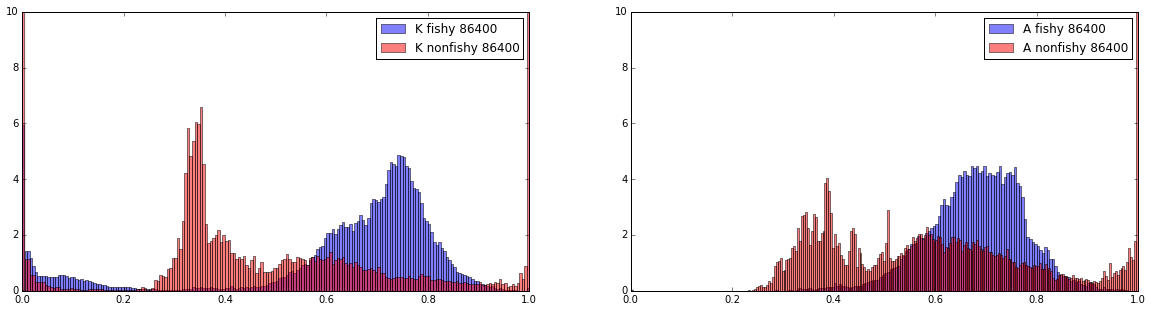

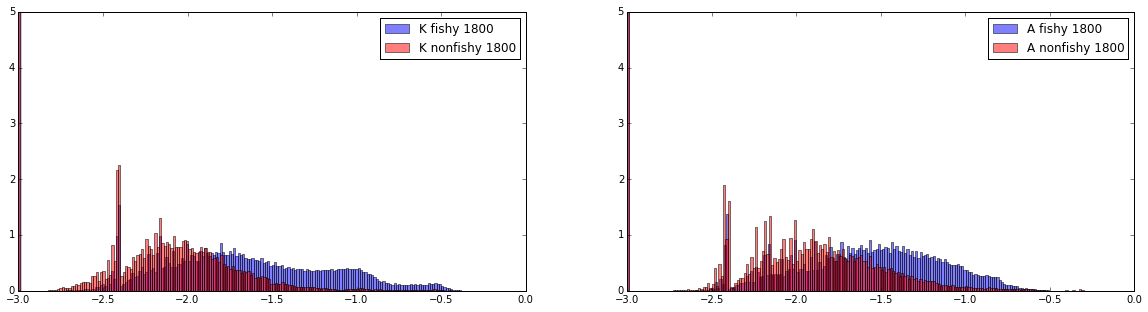

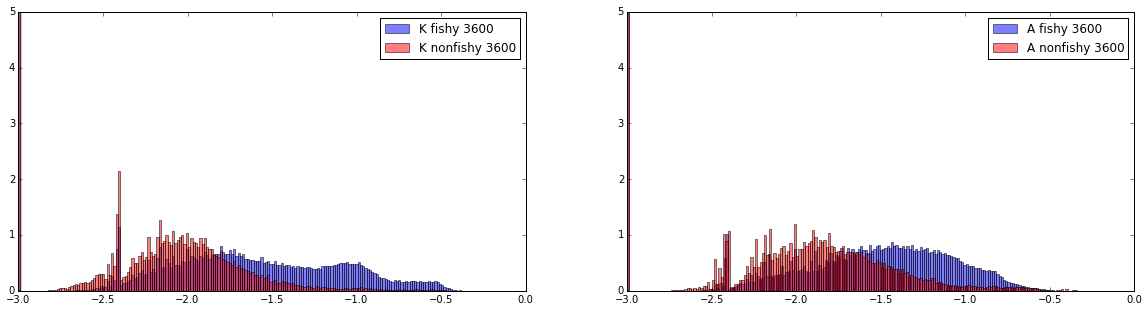

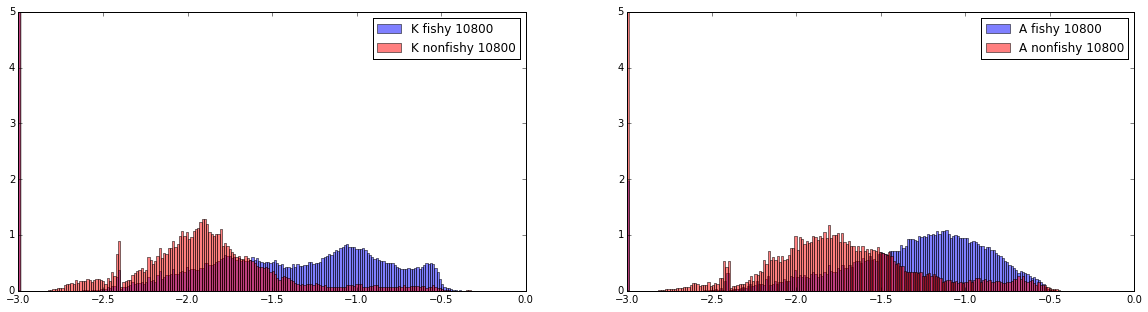

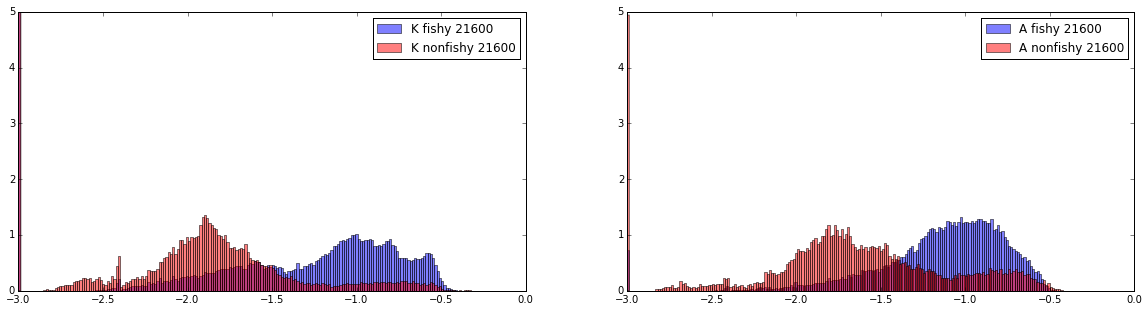

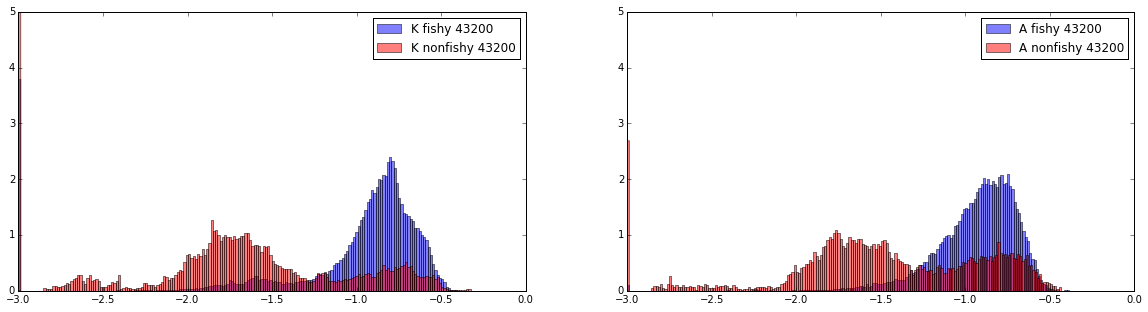

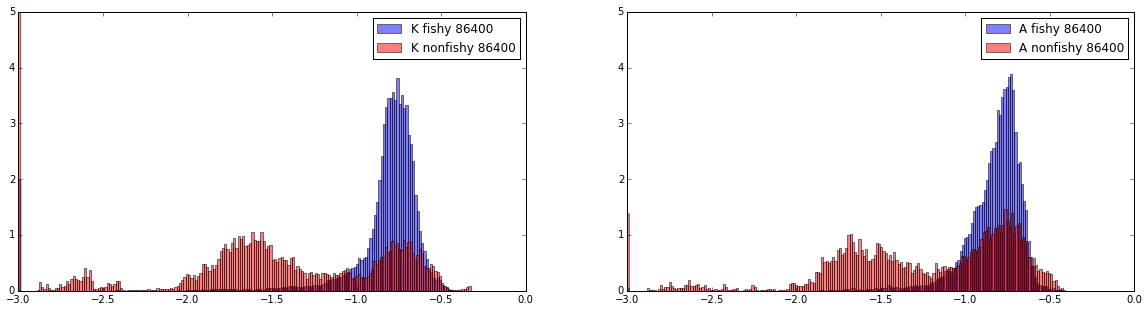

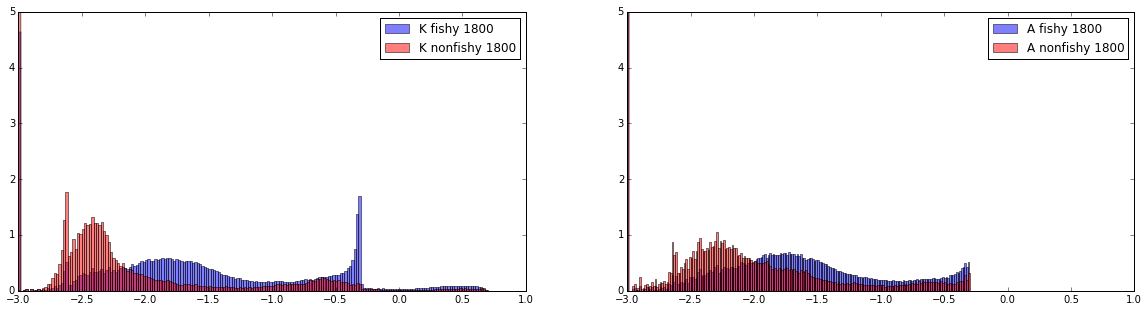

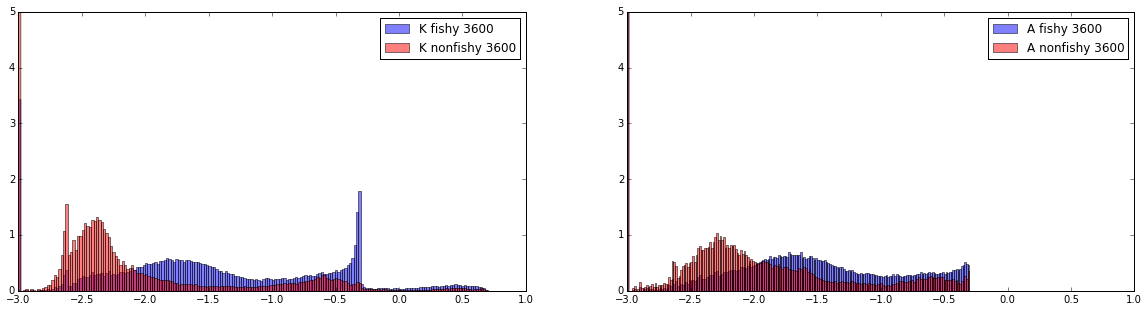

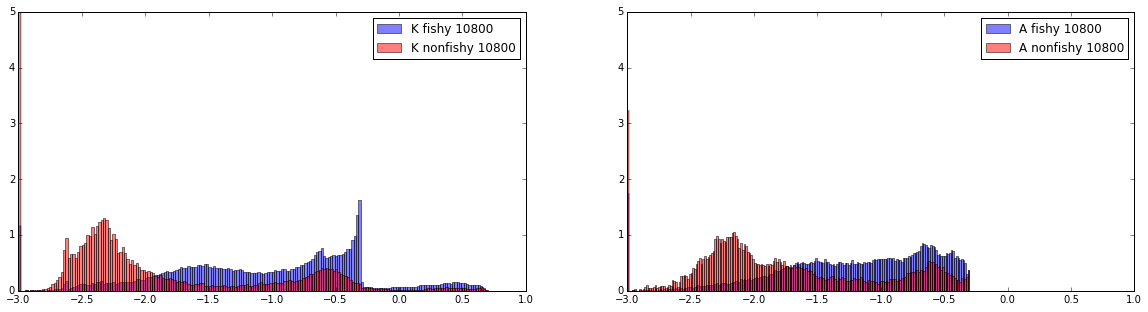

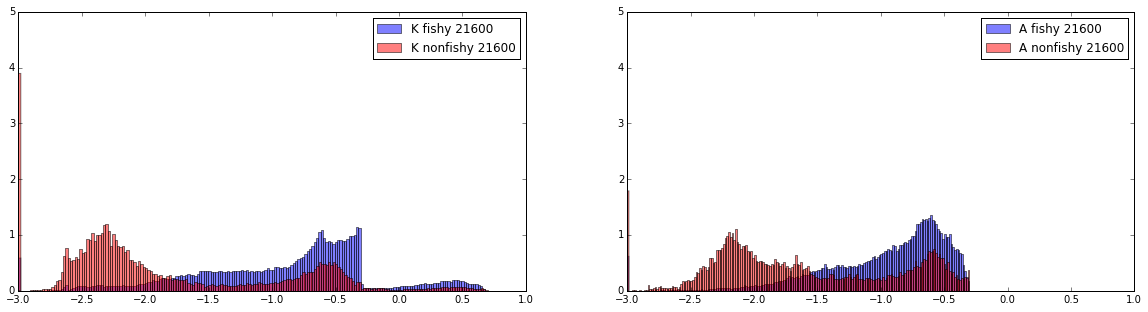

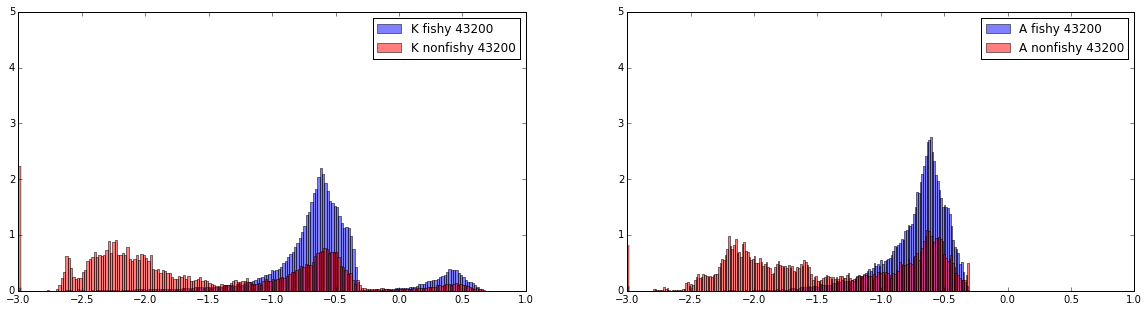

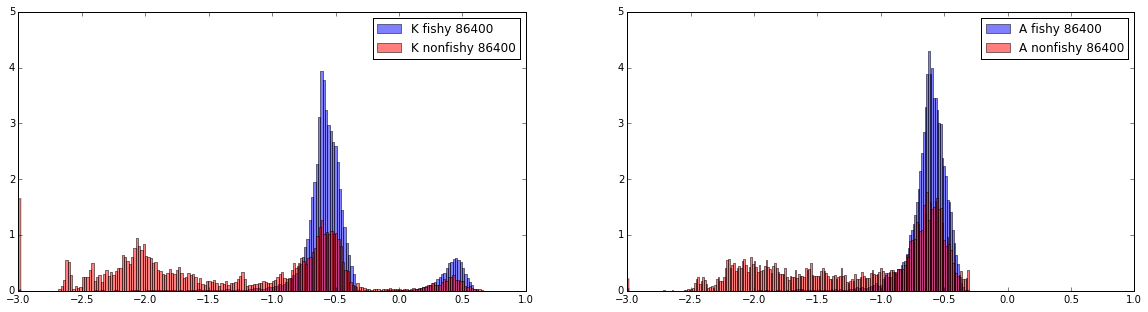

In [5]:
xfishy = fishy(x)
xnonfishy = nonfishy(x)
_xfishy = fishy(_x)
_xnonfishy = nonfishy(_x)
# _xnonfishy = nonfishy(xtest) # Was buggy
for template, xlimit, ylimit in (('measure_speedavg_{0}', (0,1), (0,10)),
                                 ('measure_speedstddev_{0}_log', (-3,0), (0,5)),
                                 ('measure_coursestddev_{0}_log', (-3,1), (0,5))):
    name = template.split('_')[1]
    display(HTML("<h1>{0}</h1>".format(name)))
    for window in [1800, 3600, 10800, 21600, 43200, 86400]:
        col = template.format(window)
        plt.figure(figsize=(20,5))
        plt.subplot(1, 2, 1)
        plt.hist(xfishy[col], bins=200, normed=True, color='b', alpha=0.5, label="K fishy " + str(window))
        plt.hist(xnonfishy[col], bins=200, normed=True, color='r', alpha=0.5, label="K nonfishy " + str(window))
        plt.legend()
        plt.xlim(*xlimit)
        plt.ylim(*ylimit)

        plt.subplot(1, 2, 2)
        plt.hist(_xfishy[col], bins=200, normed=True, color='b', alpha=0.5, label="A fishy " + str(window))
        plt.hist(_xnonfishy[col], bins=200, normed=True, color='r', alpha=0.5, label="A nonfishy " + str(window))
        plt.legend()
        plt.xlim(*xlimit)
        plt.ylim(*ylimit)
        plt.show()